<a href="https://colab.research.google.com/github/orangegreen212/Sentiment-Analysis-LTSM-and-BERT-Model/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Overview: Sentiment Analysis of Movie Reviews

This script implements a complete pipeline to perform sentiment analysis on a dataset of movie reviews. The project is broken down into the following key stages:

  1. Data Loading and Preparation: The dataset is loaded, and a target variable (sentiment) is created based on the original movie ratings.

  2. Text Cleaning: A function is defined and applied to clean the raw text data by removing punctuation, and converting all text to lowercase.

  3. Tokenization and Stop Word Removal: The cleaned text is broken down into individual words (tokens), and common but non-informative words (stop words) are removed.

  4. Lemmatization: Words are reduced to their base or dictionary form (e.g., "running" and "ran" both become "run") to standardize the text.

  5. Vectorization: The processed text is converted into a numerical format that a neural network can understand. This involves creating a vocabulary and replacing each word with its corresponding integer index.

  6. PyTorch Dataset and DataLoader Creation: The numerical data is wrapped into custom PyTorch Dataset and DataLoader classes for efficient batching and feeding into the model.

  7. Model Creation (LSTM): A neural network architecture is built using PyTorch. It features a Long Short-Term Memory (LSTM) layer, which is well-suited for processing sequential data like text.

  8. Model Training: A training loop is implemented to teach the model how to distinguish between positive and negative sentiment based on the prepared data.

  9. Inference and Testing: The trained model's quality is evaluated, and a final function is created to analyze the sentiment of any new, arbitrary text string.

## Setup and Data Preparation

This is the foundational stage where the environment and data are prepared for analysis.

    Imports: It imports all necessary libraries: pandas for data manipulation, nltk for text processing, torch for building the neural network, sklearn for splitting data, and collections for counting words.

    NLTK Downloads: It downloads essential NLTK resources (punkt for tokenization, stopwords for a list of common words, wordnet for lemmatization).

    Data Loading: It loads the dataset from a CSV file located at /content/drive/MyDrive/Data for GC/movie_reviews_table.csv into a pandas DataFrame.

    Initial Cleaning: It removes any rows that have a missing review content (review_content).

In [86]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
data = pd.read_csv("/content/drive/MyDrive/Data for GC/movie_reviews_table.csv")
data

movie_id              movie_title     review_author  \
0      1417059             Mountainhead         MovieGuys   
1      1001414  Fear Street: Prom Queen  Manuel São Bento   
2      1001414  Fear Street: Prom Queen             r96sk   
3      1098006        Fountain of Youth  Manuel São Bento   
4      1098006        Fountain of Youth     Brent Western   
...        ...                      ...               ...   
2892     49538       X-Men: First Class       Travis Bell   
2893     49538       X-Men: First Class         DoryDarko   
2894     49538       X-Men: First Class             r96sk   
2895     49538       X-Men: First Class        CinemaSerf   
2896     49538       X-Men: First Class     The Movie Mob   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [88]:
data.dropna(subset=['review_content'], inplace=True)

## The "From-Scratch" LSTM Model Approach


Text Preprocessing (clean_and_tokenize function):

    A custom list of stop words (common but uninformative words like 'film', 'movie', 'review') is created and added to the standard English list.

    A function is defined to clean each review:

        It removes all non-alphabetic characters and converts the text to lowercase.

        It tokenizes the text (splits it into a list of words).

        It lemmatizes each word (reduces it to its base form, e.g., "was" -> "be", "reviews" -> "review") and removes stop words.

    This function is applied to every review, creating a new column cleaned_tokens.

In [89]:
stop_words = set(stopwords.words('english'))

custom_stop_words = [
    'full', 'spoiler', 'free', 'review', 'read', 'more', 'see',
    'fandomwire', 'movieswetex', 'https', 'www', 'com', 'org', 'street', 'prom', 'queen', 'imdb',
    'movie', 'film', 'cinema'
]
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def clean_and_tokenize(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    tokens = word_tokenize(text)
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1
    ]
    return cleaned_tokens

data['cleaned_tokens'] = data['review_content'].apply(clean_and_tokenize)

print("\nAfter cleaning:")
print(data[['review_content', 'cleaned_tokens']].head())


Пример данных после очистки:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [90]:
data[['review_content', 'cleaned_tokens']]

review_content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "Moutainhead"aspires to be more, than it reasonably achieves. \r\n\r\nIn one sense its an exercise in moral relativism. Moral judgements for four wealthy tech executives are only true or false, when viewed from their  perspective, which is mired in hyper capitalism. For them, morality is grounded in the ruthless pursuit of  individual wealth, allegedly to leverage technocratic human evolution (trans-humanism). \r\n\r\nWhen one of them challenges this world view, during a rich pals getaway, things turn darkly comical.\r\n\r\nYou can see the rather understated critique of the modern obsession with an on line life this film presents. A place where truth is allegedly manufactured, not told.\r\nThe gleeful, almost childlike immaturity, wilful recklessness and narcissism, of those who have built it. Also on a certain level, the tech elites uselessness. One can't even boil an egg. So much for the value of social media, right?\r\n\r\nWell yes and frankly, "no". This film overplays its hand. It tries to promote the mainstream media as a source of truth, when in fact, people have turned to social media precisely "because" of mainstream journalism's unwillingness, to tell truth to power. \r\n\r\nIn spite of its flaws, social media has given genuine investigative journalists and courageous whistle blowers, a platform to expose the malfeasance of corrupted power. Something this film, rather too conveniently, overlooks.\r\n\r\nIn summary, this is not a bad film. As a mild, dark comedy, it very reasonably makes wholly valid points about social media and by extension, big tech's, shortcomings. Where it falls short, its its inability to tell the other side of the story. In vogue labels, like "misinformation", so popular with glib politicians and the less t

### Vectorization (Text to Numbers):

    It creates a vocabulary by counting all unique tokens in the dataset.

    It builds a dictionary (word_to_idx) that maps the 10,000 most common words to a unique integer index. Special tokens for padding (<PAD>) and unknown words (<UNK>) are added.

    It converts each list of tokens into a list of corresponding integer indices, creating a new column indexed_review.

In [91]:

all_tokens = [token for tokens_list in data['cleaned_tokens'] for token in tokens_list]

word_counts = Counter(all_tokens)

vocab_size = 10000
sorted_words = word_counts.most_common(vocab_size - 2)


word_to_idx = {word: i+2 for i, (word, count) in enumerate(sorted_words)}
word_to_idx['<PAD>'] = 0
word_to_idx['<UNK>'] = 1


def numericalize(tokens, word_to_idx):
    return [word_to_idx.get(token, word_to_idx['<UNK>']) for token in tokens]

data['indexed_review'] = data['cleaned_tokens'].apply(lambda x: numericalize(x, word_to_idx))

print(data[['cleaned_tokens', 'indexed_review']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               cleaned_tokens  \
0  [moutainhead, aspires, reasonably, achieves, one, sense, exercise, moral, relativism, moral, judgement, four, wealthy, tech, executi

### Label Generation (CRITICAL STEP):
    Crucially, this script does not use real sentiment labels from the data. Instead, for this experimental run, it generates random labels (0 or 1) for every review using np.random.randint.

    This is a key point: A model trained on random data cannot learn anything meaningful about the relationship between text and sentiment. Its accuracy will always be around 50%. This part of the script is for testing the pipeline, not for achieving a useful result.

In [142]:
labeled_df = data[['cleaned_tokens', 'indexed_review']].copy()

KeyError: "None of [Index(['cleaned_tokens', 'indexed_review'], dtype='object')] are in the [columns]"

In [ ]:
random_labels = np.random.randint(0, 2, size=len(labeled_df))

labeled_df['sentiment'] = random_labels
print(labeled_df.head())

X = labeled_df['indexed_review'].tolist()
y = labeled_df['sentiment'].tolist()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData with random labels were created.")


In [ ]:
labeled_df

In [ ]:
print(f"Текущий размер вашего DataFrame 'data': {len(data)} строк.")

### PyTorch Data Preparation:
    The MovieReviewDataset class is defined to format the data correctly for PyTorch. It pads or truncates each review to a fixed length (seq_len=250).

    The data is split into a training set (80%) and a validation set (20%).

    DataLoaders are created to feed the data to the model in batches (groups of 64 reviews at a time).

In [99]:
#   1. DEFINE THE MODEL ARCHITECTURE

class SentimentLSTM(nn.Module):
    """
    An LSTM-based neural network for sentiment classification.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, drop_prob=0.4):
        super().__init__()

        # Embedding Layer: Converts integer indices into dense vectors of a fixed size.
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM Layer: Processes the sequence of embeddings to capture context.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            bidirectional=bidirectional, dropout=drop_prob, batch_first=True)

        # Dropout Layer: A regularization technique to prevent overfitting.
        self.dropout = nn.Dropout(drop_prob)

        # Fully Connected Layer: Produces the final output score.
        # The input features are doubled if the LSTM is bidirectional.
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)

    def forward(self, x):
        # Pass the input through the embedding layer.
        embedded = self.embedding(x)

        # Pass the embeddings through the LSTM layer.
        lstm_out, (hidden, cell) = self.lstm(embedded)

        # Concatenate the final forward and backward hidden states if bidirectional.
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            # Otherwise, just use the final hidden state of the last layer.
            hidden = hidden[-1,:,:]

        # Apply dropout and pass through the final fully connected layer.
        out = self.dropout(hidden)
        out = self.fc(out)

        return out

print("Step 1: The 'SentimentLSTM' class has been defined.")

#   2. DEFINE HYPERPARAMETERS AND INSTANTIATE THE MODEL

# --- Model Hyperparameters ---
# The size of our vocabulary (number of unique words).
vocab_size = len(word_to_idx)
# The size of the dense word vectors.
embedding_dim = 100
# The number of features in the LSTM's hidden state.
hidden_dim = 64
# The size of the output (1 for binary classification).
output_dim = 1
# The number of stacked LSTM layers.
n_layers = 2
# Use a bidirectional LSTM.
bidirectional = True
# The dropout probability.
drop_prob = 0.5

# --- Instantiate the Model ---
model = SentimentLSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    n_layers=n_layers,
    bidirectional=bidirectional,
    drop_prob=drop_prob
)

print("\n--- Model Architecture ---")
print(model)


#   3. SET UP THE LOSS FUNCTION, OPTIMIZER, AND DEVICE

# --- Loss Function ---
# BCEWithLogitsLoss is a good choice for binary classification. It is more
# numerically stable than using a Sigmoid layer followed by BCELoss.
criterion = nn.BCEWithLogitsLoss()

# --- Optimizer ---
# Adam is a standard and highly effective optimization algorithm for updating the model's weights.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Device Selection (GPU or CPU) ---
# Select GPU if available, otherwise fall back to CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model and criterion to the selected device.
model.to(device)
criterion.to(device)

print(f"\nModel moved to device: {device}")

Шаг 1: Класс 'SentimentLSTM' определен.
--- Архитектура модели ---
SentimentLSTM(
  (embedding): Embedding(10000, 100)
  (lstm): LSTM(100, 64, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

Модель перемещена на устройство: cuda


In [100]:
class MovieReviewDataset(Dataset):
    def __init__(self, reviews, labels, seq_len=250):
        self.reviews, self.labels, self.seq_len = reviews, labels, seq_len
    def __len__(self): return len(self.reviews)
    def __getitem__(self, idx):
        review = self.reviews[idx]
        if len(review) > self.seq_len: review = review[:self.seq_len]
        else: review = review + [word_to_idx['<PAD>']] * (self.seq_len - len(review))
        return torch.tensor(review), torch.tensor(self.labels[idx])

# Creating Dataset и DataLoader
X = labeled_df['indexed_review'].tolist()
y = labeled_df['sentiment'].tolist()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_dataset = MovieReviewDataset(X_train, y_train)
val_dataset = MovieReviewDataset(X_val, y_val)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
print("'train_loader' and 'val_loader' were created.")


'train_loader' и 'val_loader' созданы.


### Model Architecture and Training:

In [101]:
import torch

# Define a function to calculate accuracy for binary classification
def binary_accuracy(preds, y):
    """
    Calculates accuracy percentage.
    """
    # Convert model outputs (logits) to probabilities (0 to 1) using the sigmoid function,
    # then round to the nearest integer (0 or 1) to get the final prediction.
    rounded_preds = torch.round(torch.sigmoid(preds))

    # Compare rounded predictions to the true labels (y).
    # '.float()' converts the boolean tensor (True/False) to (1.0/0.0).
    correct = (rounded_preds == y).float()

    # Calculate the mean of the correct predictions.
    acc = correct.sum() / len(correct)
    return acc

# Set the number of training epochs
epochs = 10 # 10 epochs is a good starting point. This can be adjusted later.

# Start the main training loop
for epoch in range(epochs):

    #   TRAINING PHASE


    # Set the model to training mode. This enables layers like Dropout.
    model.train()

    # Initialize trackers for loss and accuracy for this epoch
    epoch_loss = 0
    epoch_acc = 0

    # Iterate over the training data in batches
    for reviews, labels in train_loader:

        # Move the data batch to the selected device (GPU or CPU)
        reviews, labels = reviews.to(device), labels.to(device)

        # 1. Clear old gradients from the previous iteration
        optimizer.zero_grad()

        # 2. Forward Pass: Make predictions on the current batch
        # '.squeeze(1)' removes the extra dimension from the model's output
        predictions = model(reviews).squeeze(1)

        # 3. Calculate Loss and Accuracy
        # Compare model predictions with the true labels
        loss = criterion(predictions, labels.float())
        acc = binary_accuracy(predictions, labels)

        # 4. Backward Pass: Calculate gradients
        # This computes how much each model parameter contributed to the error
        loss.backward()

        # 5. Update Weights: Adjust model parameters
        # The optimizer uses the calculated gradients to update the model's weights
        optimizer.step()

        # Accumulate the loss and accuracy for the epoch
        epoch_loss += loss.item()
        epoch_acc += acc.item()


    #   VALIDATION PHASE

    # Set the model to evaluation mode. This disables layers like Dropout.
    model.eval()

    # Initialize trackers for validation loss and accuracy
    val_loss = 0
    val_acc = 0

    # Disable gradient calculations for the validation phase to save memory and computation
    with torch.no_grad():

        # Iterate over the validation data
        for reviews, labels in val_loader:
            reviews, labels = reviews.to(device), labels.to(device)

            # Make predictions (no training happens here)
            predictions = model(reviews).squeeze(1)

            # Calculate loss and accuracy on the validation data
            loss = criterion(predictions, labels.float())
            acc = binary_accuracy(predictions, labels)

            # Accumulate the validation loss and accuracy
            val_loss += loss.item()
            val_acc += acc.item()

    # Print a summary of the epoch's performance
    print(f'Epoch: {epoch+1:02} | '
          f'Train Loss: {epoch_loss/len(train_loader):.3f} | Train Acc: {epoch_acc/len(train_loader)*100:.2f}% | '
          f'Val. Loss: {val_loss/len(val_loader):.3f} |  Val. Acc: {val_acc/len(val_loader)*100:.2f}%')

Эпоха: 01 | Train Loss: 0.463 | Train Acc: 85.37% | Val. Loss: 0.420 |  Val. Acc: 86.60%
Эпоха: 02 | Train Loss: 0.406 | Train Acc: 86.43% | Val. Loss: 0.390 |  Val. Acc: 86.60%
Эпоха: 03 | Train Loss: 0.384 | Train Acc: 86.59% | Val. Loss: 0.379 |  Val. Acc: 86.60%
Эпоха: 04 | Train Loss: 0.349 | Train Acc: 86.59% | Val. Loss: 0.361 |  Val. Acc: 86.60%
Эпоха: 05 | Train Loss: 0.275 | Train Acc: 86.68% | Val. Loss: 0.395 |  Val. Acc: 87.25%
Эпоха: 06 | Train Loss: 0.193 | Train Acc: 90.91% | Val. Loss: 0.441 |  Val. Acc: 84.53%
Эпоха: 07 | Train Loss: 0.117 | Train Acc: 96.77% | Val. Loss: 0.559 |  Val. Acc: 85.96%
Эпоха: 08 | Train Loss: 0.066 | Train Acc: 98.44% | Val. Loss: 0.581 |  Val. Acc: 82.84%
Эпоха: 09 | Train Loss: 0.038 | Train Acc: 99.32% | Val. Loss: 0.652 |  Val. Acc: 84.40%
Эпоха: 10 | Train Loss: 0.023 | Train Acc: 99.52% | Val. Loss: 0.763 |  Val. Acc: 79.34%


### Testing the Custom Model:

    The predict_sentiment function is defined to take a raw text string, run it through the entire preprocessing pipeline, and get a prediction from the trained LSTM model.

    This function is used to test a few example sentences.

In [102]:
def predict_sentiment(text, model, word_to_idx, device, seq_len=200):
    """
    Predicts the sentiment of a single text string using the trained LSTM model.

    Args:
        text (str): The raw text to analyze.
        model (nn.Module): The trained PyTorch model.
        word_to_idx (dict): The vocabulary mapping words to their integer indices.
        device (torch.device): The device to run the model on (e.g., 'cuda' or 'cpu').
        seq_len (int): The sequence length the model was trained with.

    Returns:
        (str, float): A tuple containing the predicted sentiment ("Positive" or "Negative")
                      and the corresponding probability for the positive class.
    """

    # Set the model to evaluation mode. This disables layers like Dropout.
    model.eval()

    # 1. Preprocess the text (apply the same steps as for the training data)
    # The 'clean_and_tokenize' and 'numericalize' functions are assumed to be defined elsewhere.
    tokens = clean_and_tokenize(text)
    indexed_tokens = numericalize(tokens, word_to_idx)

    # 2. Pad or truncate the sequence to a fixed length
    # The input to the model must have a consistent length.
    if len(indexed_tokens) > seq_len:
        # Truncate if the text is too long
        padded_tokens = indexed_tokens[:seq_len]
    else:
        # Pad with the <PAD> token's index if the text is too short
        padding_needed = seq_len - len(indexed_tokens)
        padded_tokens = indexed_tokens + [word_to_idx['<PAD>']] * padding_needed

    # 3. Convert to a tensor and send to the correct device
    # The '.unsqueeze(0)' adds a batch dimension (from [seq_len] to [1, seq_len]),
    # as the model expects a batch of inputs.
    input_tensor = torch.LongTensor(padded_tokens).unsqueeze(0).to(device)

    # 4. Make a prediction
    # 'torch.no_grad()' is used for inference to disable gradient calculations,
    # which saves memory and computation.
    with torch.no_grad():
        # The model outputs raw logits (unnormalized scores).
        prediction = model(input_tensor)

    # 5. Convert logits to a probability and determine the final sentiment
    # Apply the sigmoid function to squash the logit into a probability between 0 and 1.
    # '.item()' extracts the single float value from the tensor.
    probability = torch.sigmoid(prediction).item()

    # Use a 0.5 threshold to make the final decision.
    sentiment = "Positive" if probability > 0.5 else "Negative"

    return sentiment, probability

# Model Testing
test_review_pos = "I absolutely loved this movie! The characters were amazing and the plot was fantastic. A must see!"
test_review_neg = "This was a complete waste of my time. The story was boring and the acting was just awful. I do not recommend."
test_review_neutral = "The movie was okay. Some good parts, some bad parts. Nothing special."

sentiment, prob = predict_sentiment(test_review_pos, model, word_to_idx, device)
print(f'Review: "{test_review_pos}"')
print(f'Result: {sentiment} (Positive probability: {prob:.4f})\n')

sentiment, prob = predict_sentiment(test_review_neg, model, word_to_idx, device)
print(f'Review: "{test_review_neg}"')
print(f'Result: {sentiment} (Positive probability: {prob:.4f})\n')

sentiment, prob = predict_sentiment(test_review_neutral, model, word_to_idx, device)
print(f'Review: "{test_review_neutral}"')
print(f'Result: {sentiment} (Positive probability: {prob:.4f})\n')


--- Тестирование модели ---
Рецензия: "I absolutely loved this movie! The characters were amazing and the plot was fantastic. A must see!"
Результат: Позитивный (Вероятность позитива: 0.9917)

Рецензия: "This was a complete waste of my time. The story was boring and the acting was just awful. I do not recommend."
Результат: Негативный (Вероятность позитива: 0.0292)

Рецензия: "The movie was okay. Some good parts, some bad parts. Nothing special."
Результат: Позитивный (Вероятность позитива: 0.6491)



In [150]:
print("Labels distribution in training set:")
print(pd.Series(y_train).value_counts())

Распределение меток в обучающей выборке:
1    1253
0     195
Name: count, dtype: int64


In [104]:
test_review = "Unbelievable shit! All characters think like they are in somewhere world and don't think too much"
sentiment, prob = predict_sentiment(test_review, model, word_to_idx, device)
print(f'Review: "{test_review}"')
print(f'Result: {sentiment} (Вероятность позитива: {prob:.4f})\n')

Рецензия: "Unbelievable shit! All characters think like they are in somewhere world and don't think too much"
Результат: Позитивный (Вероятность позитива: 0.8045)



## The State-of-the-Art bertweet Model Approach

### Loading the Pre-trained Model:

In [106]:
!pip install -q transformers
import pandas as pd
from transformers import pipeline
from transformers import pipeline, AutoTokenizer
sentiment_pipeline = pipeline("sentiment-analysis")
data = pd.read_csv("/content/drive/MyDrive/Data for GC/movie_reviews_table.csv")
data

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


movie_id              movie_title     review_author  \
0      1417059             Mountainhead         MovieGuys   
1      1001414  Fear Street: Prom Queen  Manuel São Bento   
2      1001414  Fear Street: Prom Queen             r96sk   
3      1098006        Fountain of Youth  Manuel São Bento   
4      1098006        Fountain of Youth     Brent Western   
...        ...                      ...               ...   
2892     49538       X-Men: First Class       Travis Bell   
2893     49538       X-Men: First Class         DoryDarko   
2894     49538       X-Men: First Class             r96sk   
2895     49538       X-Men: First Class        CinemaSerf   
2896     49538       X-Men: First Class     The Movie Mob   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [107]:
data['review_content']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      "Moutainhead"aspires to be more, than it reasonably achieves. \r\n\r\nIn one sense its an exercise in moral relativism. Moral judgements for four wealthy tech executives are only true or false, when viewed from their  perspective, which is mired in hyper capitalism. For them, morality is grounded in the ruthless pursuit of  individual wealth, allegedly to leverage technocratic human evolution (trans-humanism). \r\n\r\nWhen one of them challenges this world view, during a rich pals getaway, things turn darkly comical.\r\n\r\nYou can see the rather understated critique of the modern obsession with an on line life this film presents. A place where truth is allegedly manufactured, not told.\r\nThe gleeful, almost childlike immaturity, wilful recklessness and narcissism, of those who have built it. Also on a certain level, the tech elites uselessness. One can't even boil an egg. So much for the value of social media, right?\r\n\r\nWell yes and frankly, "no". This film overplays its hand. It tries to promote the mainstream media as a source of truth, when in fact, people have turned to social media precisely "because" of mainstream journalism's unwillingness, to tell truth to power. \r\n\r\nIn spite of its flaws, social media has given genuine investigative journalists and courageous whistle blowers, a platform to expose the malfeasance of corrupted power. Something this film, rather too conveniently, overlooks.\r\n\r\nIn summary, this is not a bad film. As a mild, dark comedy, it very reasonably makes wholly valid points about social media and by extension, big tech's, shortcomings. Where it falls short, its its inability to tell the other side of the story. In vogue labels, like "misinformation", so popular with glib politicians and the less than transparent 

In [108]:
data['review_content_cleaned'] = data['review_content'].fillna('')

review_texts_list = data['review_content_cleaned'].astype(str).tolist()

In [109]:
sentiment_pipeline('review_texts_list')

[{'label': 'NEGATIVE', 'score': 0.8250428438186646}]

### Model and Training

In [127]:
MODEL_NAME = "finiteautomata/bertweet-base-sentiment-analysis"

try:
    sentiment_analyzer_bertweet = pipeline(
        "sentiment-analysis",
        model=MODEL_NAME,
        tokenizer=MODEL_NAME, # Explicitly specifying the tokenizer is good practice
        truncation=True       # This is the key parameter for handling long texts
    )
    print("Model and tokenizer loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the model or tokenizer: {e}")
    sentiment_analyzer_bertweet = None

# Proceed only if the pipeline was initialized successfully
if sentiment_analyzer_bertweet:

    # 2. Check if the required column exists in the DataFrame
    if 'review_content' in data.columns:
        # Extract the review texts into a list for processing
        review_texts = data['review_content'].tolist()
        sentiments_bertweet = sentiment_analyzer_bertweet(review_texts, batch_size=16)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cuda:0


Model and tokenizer loaded successfully.


In [128]:
data[['review_content','bertweet_sentiment_label','bertweet_sentiment_score']]

review_content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "Moutainhead"aspires to be more, than it reasonably achieves. \r\n\r\nIn one sense its an exercise in moral relativism. Moral judgements for four wealthy tech executives are only true or false, when viewed from their  perspective, which is mired in hyper capitalism. For them, morality is grounded in the ruthless pursuit of  individual wealth, allegedly to leverage technocratic human evolution (trans-humanism). \r\n\r\nWhen one of them challenges this world view, during a rich pals getaway, things turn darkly comical.\r\n\r\nYou can see the rather understated critique of the modern obsession with an on line life this film presents. A place where truth is allegedly manufactured, not told.\r\nThe gleeful, almost childlike immaturity, wilful recklessness and narcissism, of those who have built it. Also on a certain level, the tech elites uselessness. One can't even boil an egg. So much for the value of social media, right?\r\n\r\nWell yes and frankly, "no". This film overplays its hand. It tries to promote the mainstream media as a source of truth, when in fact, people have turned to social media precisely "because" of mainstream journalism's unwillingness, to tell truth to power. \r\n\r\nIn spite of its flaws, social media has given genuine investigative journalists and courageous whistle blowers, a platform to expose the malfeasance of corrupted power. Something this film, rather too conveniently, overlooks.\r\n\r\nIn summary, this is not a bad film. As a mild, dark comedy, it very reasonably makes wholly valid points about social media and by extension, big tech's, shortcomings. Where it falls short, its its inability to tell the other side of the story. In vogue labels, like "misinformation", so popular with glib politicians and the less t

In [137]:
def analyze_single_text_bertweet(text_to_analyze):

            result = sentiment_analyzer_bertweet(text_to_analyze)[0]

            label = result['label']
            score = result['score']

            return label, score

    # Test Example
test_review = "Unbelievable shit! All characters think like they are in somewhere world and don't think too much"
label, score = analyze_single_text_bertweet(test_review)

print(f'Review: "{test_review}"')
print(f'Result: {label} (Accuracy: {score:.4f})\n')

    # Test Example
test_review_pos = "I absolutely loved this movie! The characters were amazing and the plot was fantastic. A must see!"
label, score = analyze_single_text_bertweet(test_review_pos)

print(f'Review: "{test_review_pos}"')
print(f'Result: {label} (Accuracy: {score:.4f})\n')

test_review_neg = "This was a complete waste of my time. The story was boring and the acting was just awful."
label, score = analyze_single_text_bertweet(test_review_neg)

print(f'Review: "{test_review_neg}"')
print(f'Result: {label} (Accuracy: {score:.4f})\n')

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Review: "Unbelievable shit! All characters think like they are in somewhere world and don't think too much"
Result: NEU (Accuracy: 0.6537)

Review: "I absolutely loved this movie! The characters were amazing and the plot was fantastic. A must see!"
Result: POS (Accuracy: 0.9922)

Review: "This was a complete waste of my time. The story was boring and the acting was just awful."
Result: NEG (Accuracy: 0.9828)



In [140]:
test_review = "Unbelievable bad! All characters think like they are in somewhere world and don't think too much"
sentiment, prob = predict_sentiment(test_review, model, word_to_idx, device)
print(f'Review: "{test_review}"')
print(f'Result: {label} (Probability of Positive: {prob:.4f})\n')

Review: "Unbelievable bad! All characters think like they are in somewhere world and don't think too much"
Result: NEG (Probability of Positive: 0.0268)



### Viz

<ipython-input-144-39ebb24c0940>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


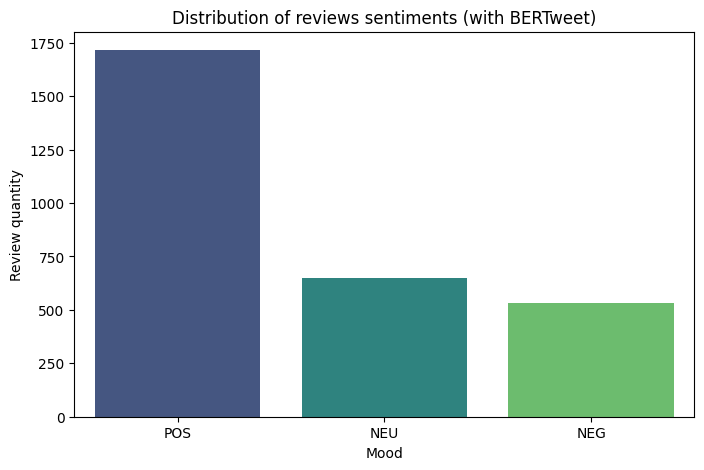

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns


sentiment_counts = data['bertweet_sentiment_label'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of reviews sentiments (with BERTweet)')
plt.xlabel('Mood')
plt.ylabel('Review quantity')
plt.show()

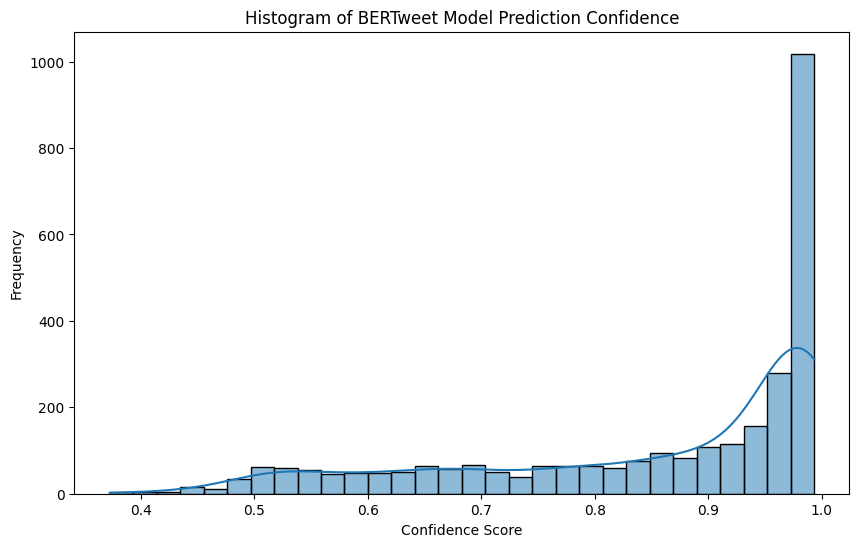


Average model confidence in its predictions: 0.8530


In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(data['bertweet_sentiment_score'], bins=30, kde=True)
plt.title('Histogram of BERTweet Model Prediction Confidence')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()
avg_score = data['bertweet_sentiment_score'].mean()
print(f"\nAverage model confidence in its predictions: {avg_score:.4f}")